In [329]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [330]:
#Reading the file
data=pd.read_csv('Country-data.csv')

In [331]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


From the above output, we are having 10 columns out of which 1 column is object type.

In [332]:
#Checking for null values
data.isna().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [333]:
data.iloc[15]

country       Belgium
child_mort        4.5
exports          76.4
health           10.7
imports          74.7
income          41100
inflation        1.88
life_expec         80
total_fer        1.86
gdpp            44400
Name: 15, dtype: object

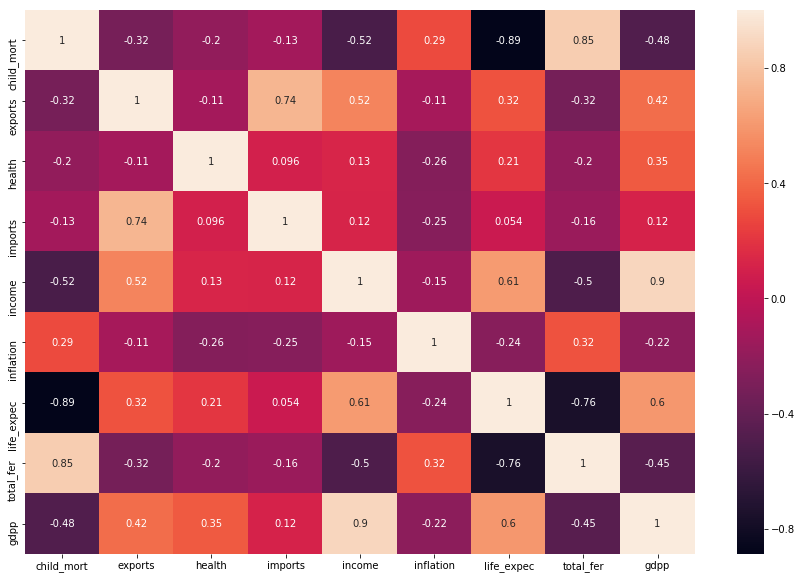

In [334]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(),annot=True)
plt.show()

<h3>Outlier detection

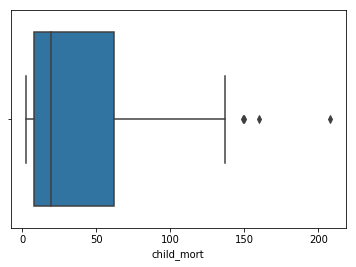

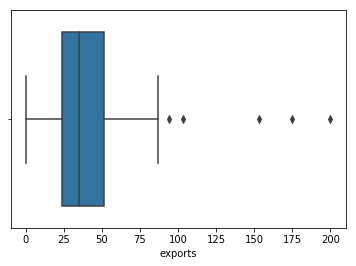

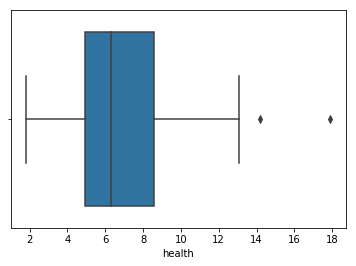

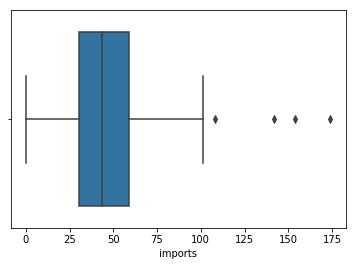

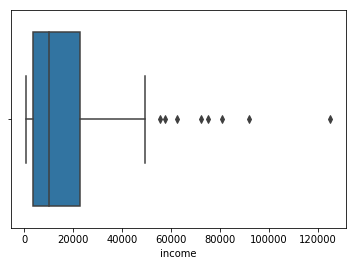

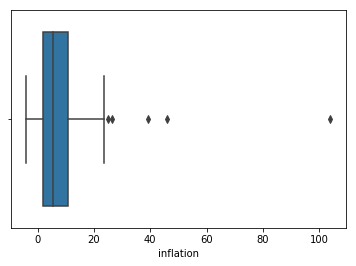

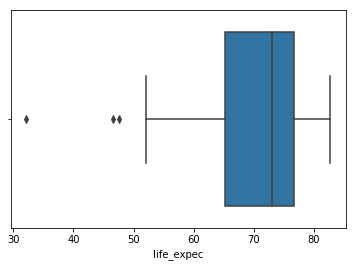

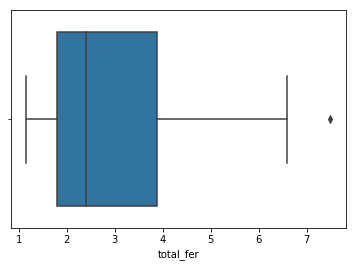

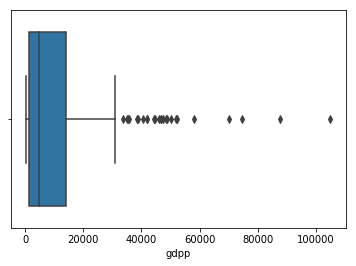

In [335]:
#Checking Outliers
for c in data.columns:
    if data.dtypes[c] != np.object:
        sns.boxplot(data[c])
        plt.show()

As we can see that data is having outliers. All the columns are having outliers

In [336]:
selected_data=data.iloc[:,1:]
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3 - q1
print(IQR)

child_mort       53.850
exports          27.550
health            3.680
imports          28.550
income        19445.000
inflation         8.940
life_expec       11.500
total_fer         2.085
gdpp          12720.000
dtype: float64


In [337]:
selected_data[(selected_data < (q1 - 1.5 * IQR)) | (selected_data > (q1 + 1.5 * IQR))]

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,NaN,NaN,NaN,NaN,NaN,NaN,5.82,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,16.1,NaN,NaN,NaN
3,119.0,NaN,NaN,NaN,NaN,22.4,NaN,6.16,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,20.9,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,41400.0,NaN,NaN,NaN,51900.0
8,NaN,NaN,11.0,NaN,43200.0,NaN,NaN,NaN,46900.0
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [338]:
selected_data[(selected_data < (q1 - 1.5 * IQR)) | (selected_data > (q1 + 1.5 * IQR))].count()

child_mort    25
exports       26
health        20
imports       18
income        29
inflation     26
life_expec     5
total_fer     28
gdpp          35
dtype: int64

As we can see that we are having outliers in the dataset and our dataset conatins unique rows specific to each country. If we remove those rows then it would be a problem, as we will loss data for many country.

As we can see that data is having outliers. All the columns are having outliers

In [339]:
#Analysing the outliers column by column
data.quantile([0.25,0.5,0.75])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0.25,8.25,23.80,4.92,30.20,3355.0,1.81,65.3,1.795,1330.0
0.50,19.30,35.00,6.32,43.30,9960.0,5.39,73.1,2.410,4660.0
0.75,62.10,51.35,8.60,58.75,22800.0,10.75,76.8,3.880,14050.0


In [340]:
#Perform Scaling on the dataset
selected_data=data.iloc[:,1:]
scale=StandardScaler()

In [341]:
scaled_data=scale.fit_transform(selected_data)
scaled_df=pd.DataFrame(scaled_data,index=selected_data.index,columns=selected_data.columns)

C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\hni7kor\AppData\Roaming\Python\Python37\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [342]:
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [343]:
#Checking standard deviation of scaled data
scaled_data.std()

1.0

In [344]:
#Checking mean of scaled data
scaled_data.mean()

1.9737298215558337e-16

In [345]:
#Checking head of scaled dataframe
scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


No of Components:: 1
PCA Components array [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]]


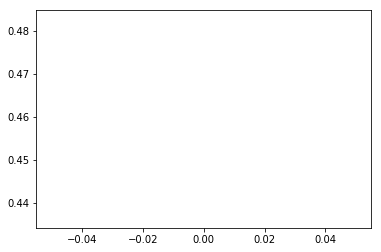

No of Components:: 2
PCA Components array [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]]


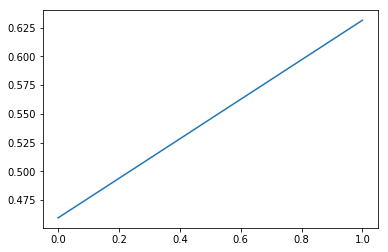

No of Components:: 3
PCA Components array [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]]


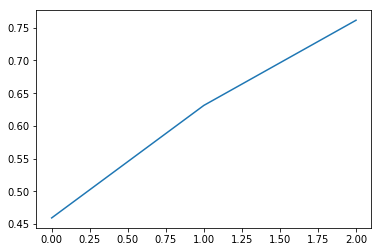

No of Components:: 4
PCA Components array [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]]


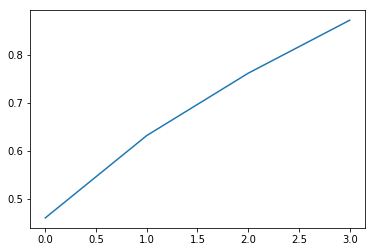

No of Components:: 5
PCA Components array [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]]


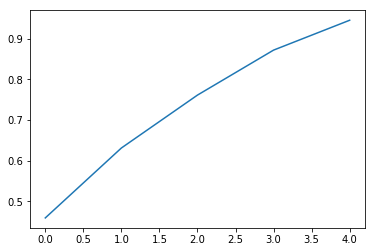

No of Components:: 6
PCA Components array [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]]


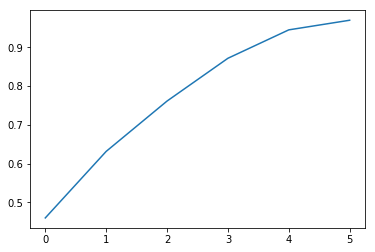

No of Components:: 7
PCA Components array [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]]


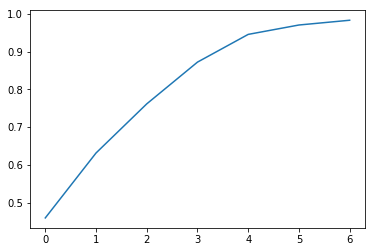

No of Components:: 8
PCA Components array [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]]


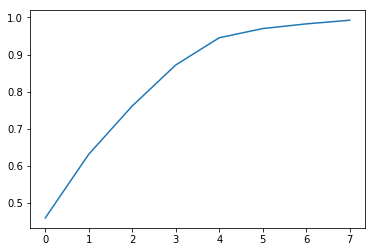

No of Components:: 9
PCA Components array [[-0.41951945  0.28389698  0.15083782  0.16148244  0.39844111 -0.19317293
   0.42583938 -0.40372896  0.39264482]
 [ 0.19288394  0.61316349 -0.24308678  0.67182064  0.02253553 -0.00840447
  -0.22270674  0.15523311 -0.0460224 ]
 [-0.02954353  0.14476069 -0.59663237 -0.29992674  0.3015475   0.64251951
   0.11391854  0.01954925  0.12297749]
 [ 0.37065326  0.00309102  0.4618975  -0.07190746  0.39215904  0.15044176
  -0.20379723  0.37830365  0.53199457]
 [-0.16896968  0.05761584  0.51800037  0.25537642 -0.2471496   0.7148691
   0.1082198  -0.13526221 -0.18016662]
 [ 0.20062815 -0.05933283  0.00727646 -0.03003154  0.16034699  0.06628537
  -0.60112652 -0.75068875  0.01677876]
 [-0.07948854 -0.70730269 -0.24983051  0.59218953  0.09556237  0.10463252
   0.01848639  0.02882643  0.24299776]
 [-0.68274306 -0.01419742  0.07249683 -0.02894642  0.35262369 -0.01153775
  -0.50466425  0.29335267 -0.24969636]
 [ 0.3275418  -0.12308207  0.11308797  0.09903717  0.61

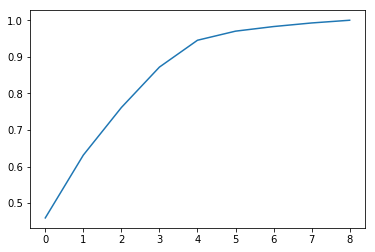

In [346]:
#Applying PCA and checking variance on all values of n_components
for val in range(1,10):
    pca=PCA(random_state=42,n_components=val)
    projected_data=pca.fit_transform(scaled_data)
    print('No of Components::',val)
    plt.plot(np.cumsum(pca.explained_variance_ratio_))
    print('PCA Components array',pca.components_)
    plt.show()
    

In [347]:
final_pca=PCA(random_state=42,n_components=7)
final_projected_data=final_pca.fit_transform(scaled_data)

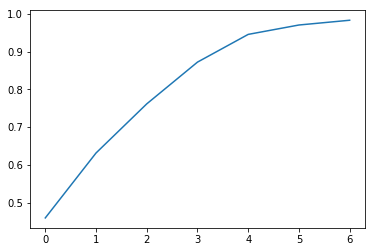

In [348]:
plt.plot(np.cumsum(final_pca.explained_variance_ratio_))
#print('PCA Components array',final_pca.components_)
plt.show()

With 7 components we are getting maximum variance

In [349]:
colnames = list(data.drop('country',axis=1).columns)
pca_df = pd.DataFrame({ 'Feature':colnames,'PC1':final_pca.components_[0],'PC2':final_pca.components_[1],'PC3':final_pca.components_[2],'PC4':final_pca.components_[3],'PC5':final_pca.components_[4],'PC6':final_pca.components_[5],'PC7':final_pca.components_[6]})
pca_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,child_mort,-0.419519,0.192884,-0.029544,0.370653,-0.168970,0.200628,-0.079489
1,exports,0.283897,0.613163,0.144761,0.003091,0.057616,-0.059333,-0.707303
2,health,0.150838,-0.243087,-0.596632,0.461897,0.518000,0.007276,-0.249831
3,imports,0.161482,0.671821,-0.299927,-0.071907,0.255376,-0.030032,0.592190
4,income,0.398441,0.022536,0.301548,0.392159,-0.247150,0.160347,0.095562
5,inflation,-0.193173,-0.008404,0.642520,0.150442,0.714869,0.066285,0.104633
6,life_expec,0.425839,-0.222707,0.113919,-0.203797,0.108220,-0.601127,0.018486
7,total_fer,-0.403729,0.155233,0.019549,0.378304,-0.135262,-0.750689,0.028826
8,gdpp,0.392645,-0.046022,0.122977,0.531995,-0.180167,0.016779,0.242998


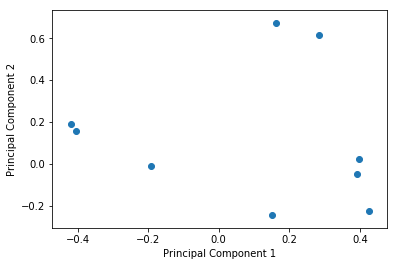

In [350]:
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [351]:
#Checking the shape of resulted data
final_projected_data.shape

(167, 7)

In [352]:
#Transposing the data to create the dataframe
pca_result_array = np.transpose(final_projected_data)
pca_result_array

array([[-2.91302459,  0.42991133, -0.28522508, ...,  0.49852439,
        -1.88745106, -2.86406392],
       [ 0.09562058, -0.58815567, -0.45517441, ...,  1.39074432,
        -0.10945301,  0.48599799],
       [-0.7181185 , -0.3334855 ,  1.22150481, ..., -0.23852611,
         1.10975159,  0.22316658],
       ...,
       [-0.15831004,  0.17467732,  0.15647465, ...,  1.17608067,
         0.61836532, -0.27406773],
       [-0.25459744,  0.08457863, -0.4016955 , ...,  0.05160677,
        -0.54091719,  0.20137816],
       [ 0.38300026,  0.24891887, -0.08721359, ..., -0.14362677,
         0.06025631, -0.44218462]])

In [353]:
#Creating the dataframe
list_country = list(data['country'])
final_updated_df = pd.DataFrame({'country':list_country,'PC1':pca_result_array[0],'PC2':pca_result_array[1],'PC3':pca_result_array[2],'PC4':pca_result_array[3],'PC5':pca_result_array[4],'PC6':pca_result_array[5],'PC7':pca_result_array[6]})
final_updated_df.head()

,country,PC1,PC2,PC3,PC4,PC5,PC6,PC7
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214
3,Angola,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978


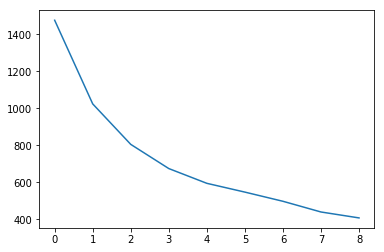

In [354]:
#Elbow method to find number of cluster(value of K)
train_data=final_updated_df.iloc[:,1:]
ssd = []
silhoute_score=[]
for val in list(range(1,10)):
    model_clus = KMeans(n_clusters = val, max_iter=50,random_state=42)
    model_clus.fit(train_data)
    ssd.append(model_clus.inertia_)
plt.plot(ssd)
plt.show()

In [355]:
#Checking silhouette score
sil_score = []
for k in range(2, 10):
    sil_model = KMeans(n_clusters=k,random_state=42).fit(train_data)
    sil_score.append([k, silhouette_score(train_data, sil_model.labels_)])

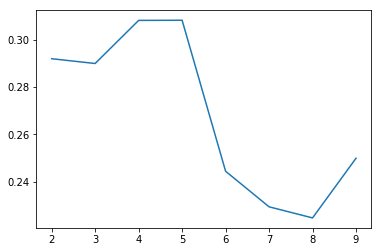

In [356]:
#Plotting silhouette score
plt.plot(pd.DataFrame(sil_score)[0], pd.DataFrame(sil_score)[1]);

In [357]:
model_clus5 = KMeans(n_clusters = 4, max_iter=50,random_state=42)
model_clus5.fit(train_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=42, tol=0.0001, verbose=0)

<h3>Creating Model[K-means]

In [358]:
#Creating model
list_country = list(data['country'])
final_updated_df = pd.DataFrame({'country':list_country,'PC1':pca_result_array[0],'PC2':pca_result_array[1],'PC3':pca_result_array[2],'PC4':pca_result_array[3],'PC5':pca_result_array[4],'PC6':pca_result_array[5],'PC7':pca_result_array[6],'Cluster':pd.Series(model_clus5.labels_)})
final_updated_df.head()

,country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Cluster
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,1
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,0
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,0
3,Angola,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,1
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,0


In [359]:
final_updated_df['Cluster'].value_counts()

0    87
1    47
2    30
3     3
Name: Cluster, dtype: int64

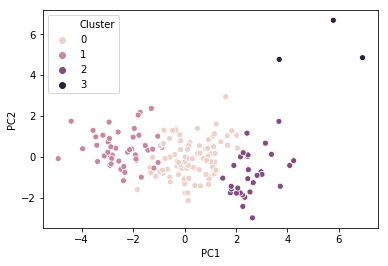

In [360]:
sns.scatterplot(x='PC1',y='PC2',hue='Cluster',legend='full',data=final_updated_df)
plt.show()

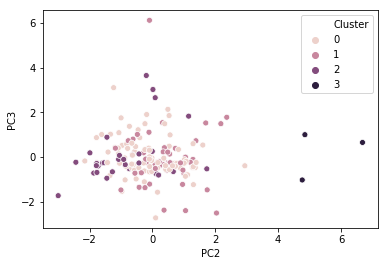

In [361]:
sns.scatterplot(x='PC2',y='PC3',hue='Cluster',legend='full',data=final_updated_df)
plt.show()

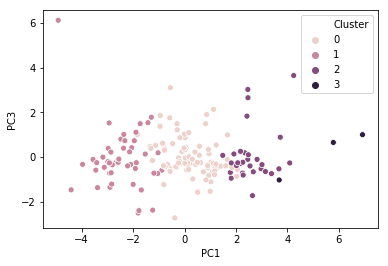

In [362]:
sns.scatterplot(x='PC1',y='PC3',hue='Cluster',legend='full',data=final_updated_df)
plt.show()

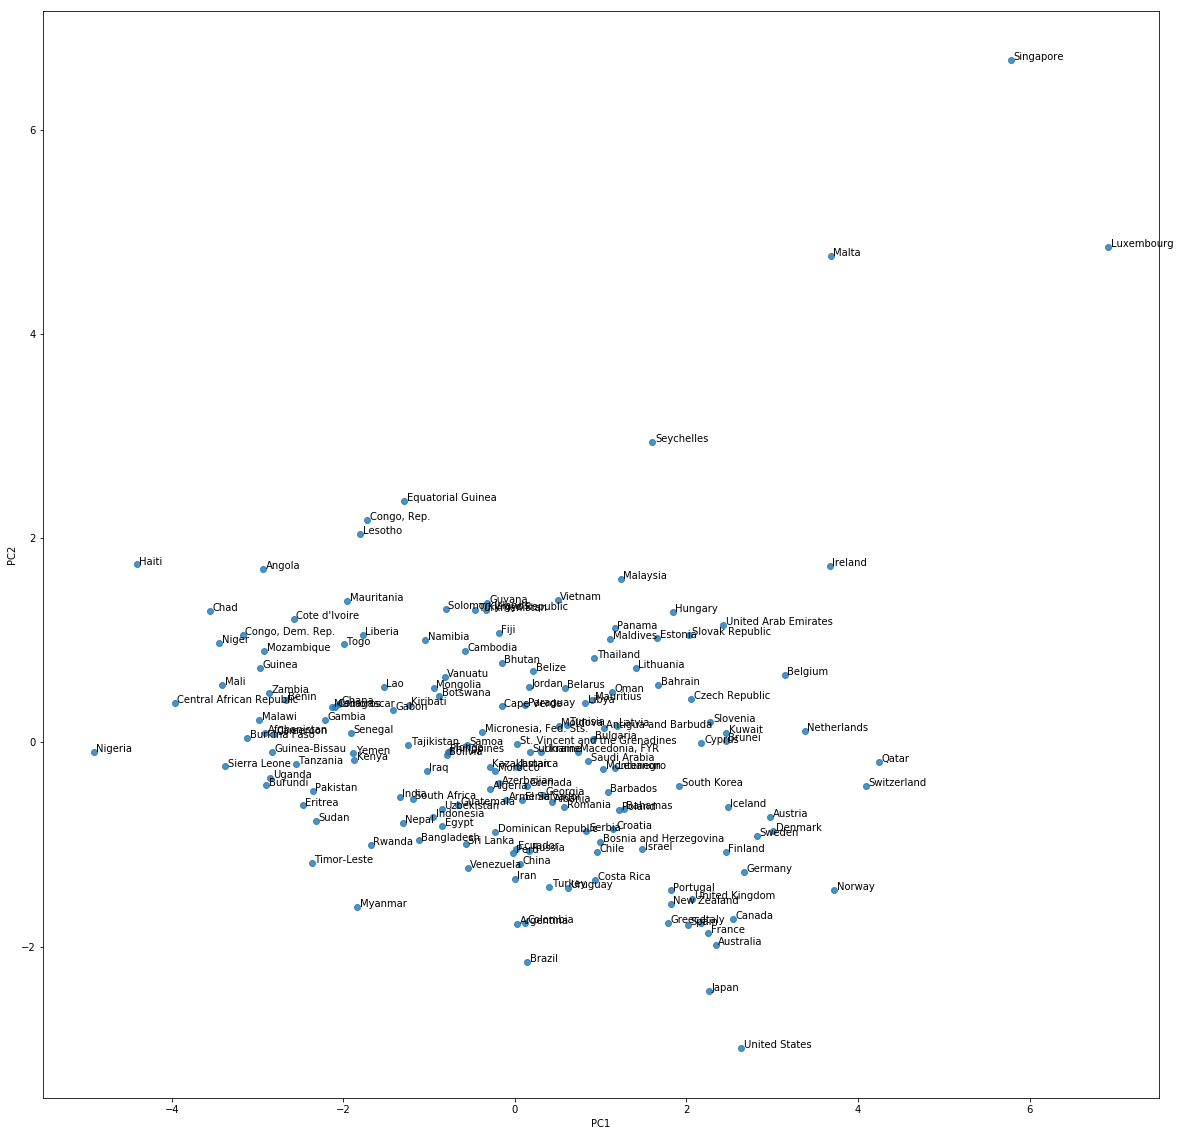

In [376]:
#Plot between PC1 AND PC2
plt.figure(figsize=(20, 20))
sns.regplot(x='PC1', y='PC2', data=final_updated_df, fit_reg=False)

def create_label(x_val, y_val, val, axis):
    store = pd.concat({'xcor': x_val, 'ycor': y_val, 'value': val}, axis=1)
    for i, point in store.iterrows():
        axis.text(point['xcor']+.03, point['ycor'], str(point['value']))

create_label(final_updated_df.PC1, final_updated_df.PC2, final_updated_df.country, plt.gca())

In [364]:
final_merged_data=pd.merge(final_updated_df,data)
final_merged_data.head()

,country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,1,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,0,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,0,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,0,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [365]:
#Analysis of Cluster
mean_child_mort = pd.DataFrame(final_merged_data.groupby(["Cluster"]).child_mort.mean())
mean_exports= pd.DataFrame(final_merged_data.groupby(["Cluster"]).exports.mean())
mean_health = pd.DataFrame(final_merged_data.groupby(["Cluster"]).health.mean())
mean_imports = pd.DataFrame(final_merged_data.groupby(["Cluster"]).imports.mean())
mean_income = pd.DataFrame(final_merged_data.groupby(["Cluster"]).income.mean())
mean_inflat = pd.DataFrame(final_merged_data.groupby(["Cluster"]).inflation.mean())
mean_life_expec = pd.DataFrame(final_merged_data.groupby(["Cluster"]).life_expec.mean())
mean_total_fer = pd.DataFrame(final_merged_data.groupby(["Cluster"]).total_fer.mean())
mean_gdpp = pd.DataFrame(final_merged_data.groupby(["Cluster"]).gdpp.mean())

In [366]:
Analysis_df= pd.concat([pd.Series([0,1,2,3]),mean_child_mort,mean_exports,mean_health,mean_imports,mean_income,mean_inflat,mean_life_expec,
                                 mean_total_fer,mean_gdpp], axis=1)

In [367]:
Analysis_df.columns = ["Cluster","mean_child_mort","mean_exports","mean_health","mean_imports","mean_income","mean_inflation","mean_life_expec","mean_total_fer","mean_gdpp"]
Analysis_df

,Cluster,mean_child_mort,mean_exports,mean_health,mean_imports,mean_income,mean_inflation,mean_life_expec,mean_total_fer,mean_gdpp
0,0,21.389655,41.290678,6.235862,48.038689,12968.620690,7.413460,72.935632,2.286552,6919.103448
1,1,92.961702,29.151277,6.388511,42.323404,3942.404255,12.019681,59.187234,5.008085,1922.382979
2,2,4.953333,45.826667,9.168667,39.736667,45250.000000,2.742200,80.376667,1.795333,43333.333333
3,3,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667


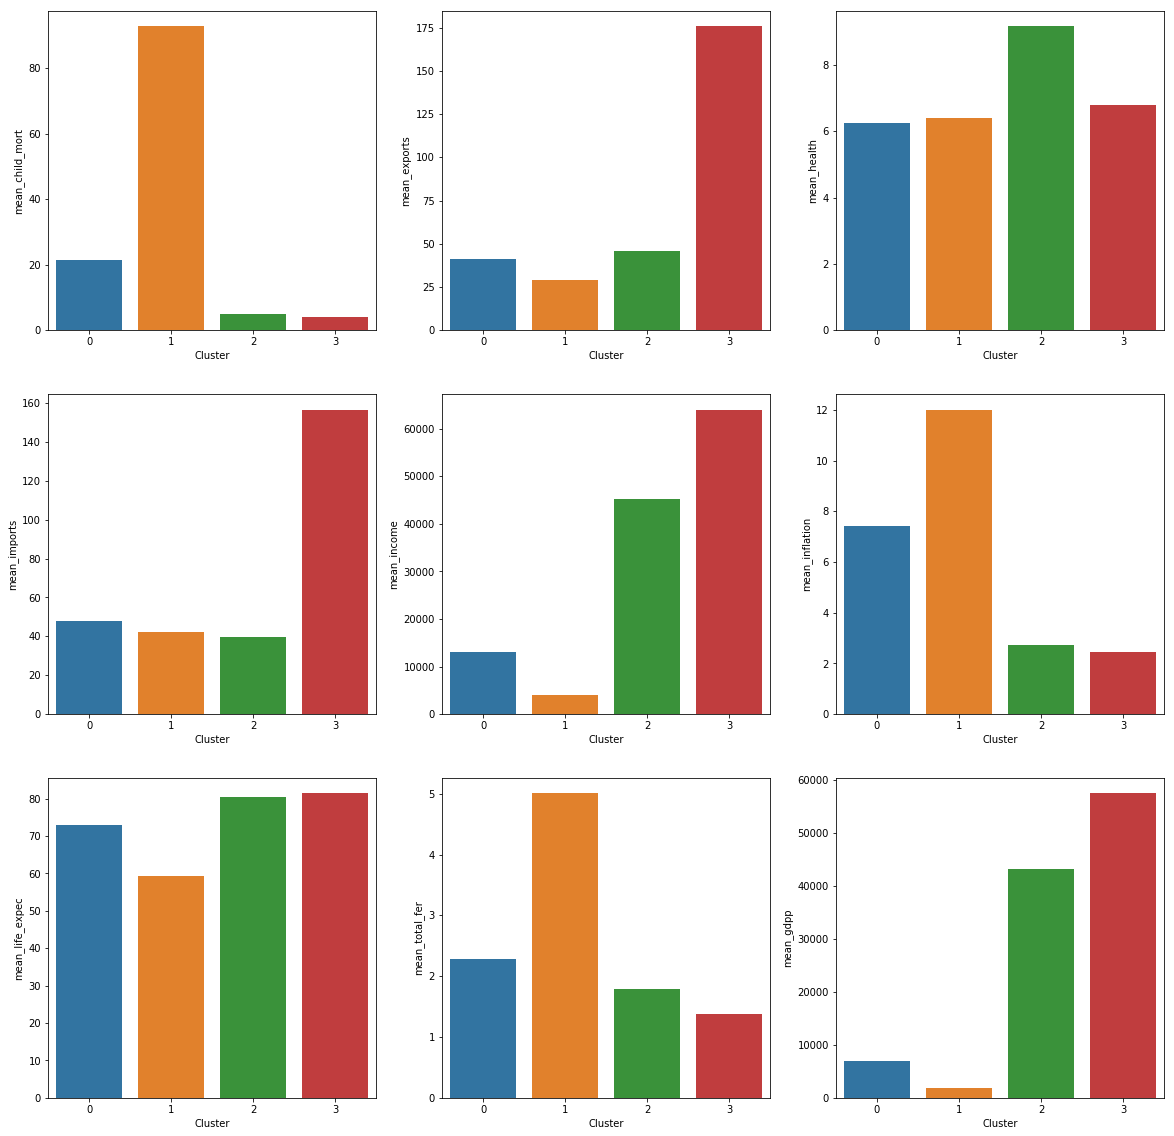

In [375]:
#Plots
plt.figure(figsize = (20,20))
plt.figure(1)

# Plot 1
plt.subplot(3, 3, 1)
sns.barplot(Analysis_df.Cluster, Analysis_df.mean_child_mort)

# Plot 2 
plt.subplot(3, 3, 2)
sns.barplot(Analysis_df.Cluster, Analysis_df.mean_exports)

# Plot 3
plt.subplot(3, 3, 3)
sns.barplot(Analysis_df.Cluster, Analysis_df.mean_health)

# Plot 4 
plt.subplot(3, 3, 4)
sns.barplot(Analysis_df.Cluster, Analysis_df.mean_imports)

# Plot 5 
plt.subplot(3, 3, 5)
sns.barplot(Analysis_df.Cluster, Analysis_df.mean_income)

# Plot 6 
plt.subplot(3, 3, 6)
sns.barplot(Analysis_df.Cluster, Analysis_df.mean_inflation)

# Plot 7 
plt.subplot(3, 3, 7)
sns.barplot(Analysis_df.Cluster, Analysis_df.mean_life_expec)

# Plot 8
plt.subplot(3, 3, 8)
sns.barplot(Analysis_df.Cluster, Analysis_df.mean_total_fer)

# Plot 9
plt.subplot(3, 3, 9)
sns.barplot(Analysis_df.Cluster, Analysis_df.mean_gdpp)

plt.show()

As we can see from above graph that Cluster 1 needed to paid attention. Reason are
<li> Highest mortality rate
<li> Lowest exports
<li> Lowest Income
<li> Highest Inflation
<li> Highest total fertility
<li> Lowest GDP 

<h3>Hierarchical Clustering</h3>

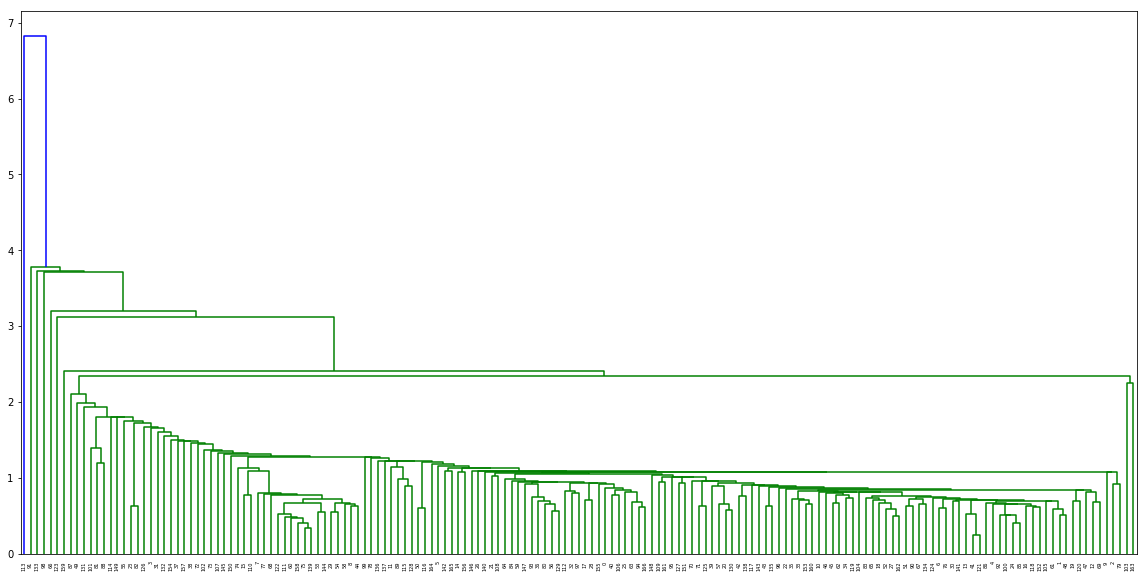

In [311]:
#Single linkage
plt.figure(figsize = (20,10))
mergings_single = linkage(train_data, method = "single", metric='euclidean')
dendrogram(mergings_single)
plt.show()

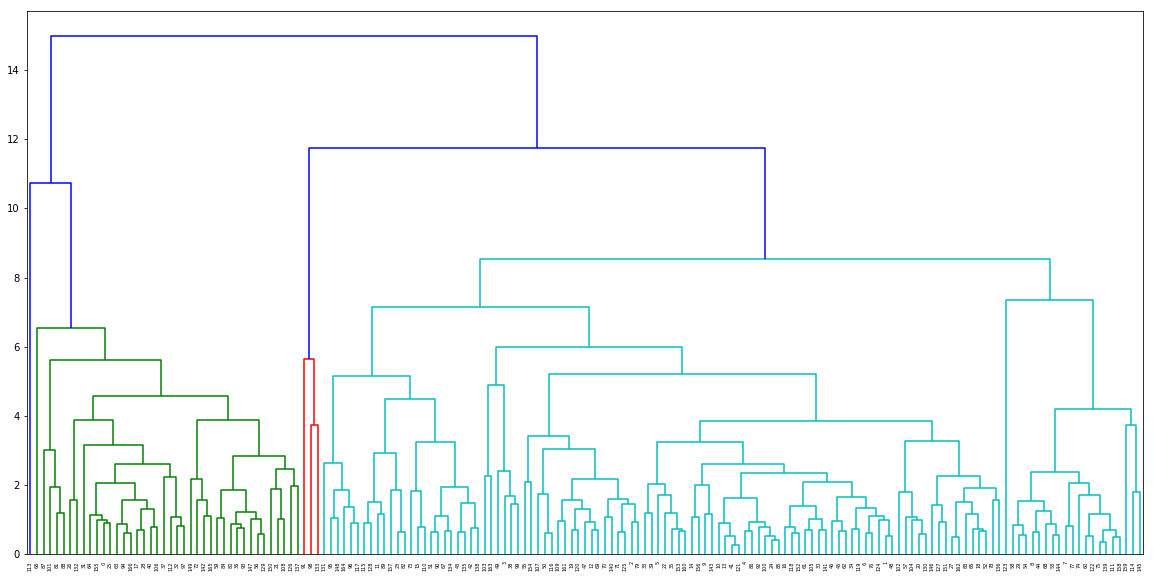

In [312]:
#Complete Linkage
plt.figure(figsize = (20,10))
mergings_complete = linkage(train_data, method = "complete", metric='euclidean')
dendrogram(mergings_complete)
plt.show()

In [313]:
cut_point = pd.Series(cut_tree(mergings_complete, n_clusters = 4).reshape(-1,))
hierarchical_data = pd.concat([train_data, cut_point], axis=1)

In [314]:
hierarchical_data

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,0
0,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0
1,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,1
2,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,1
3,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,1
4,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,1
5,0.022407,-1.779187,0.869997,-0.036967,0.981057,-0.003596,-0.150832,1
6,-0.101584,-0.568252,0.242092,-1.466266,-0.055992,0.282469,0.546907,1
7,2.342165,-1.988459,0.190344,1.105038,-0.731192,-0.156455,0.382386,1
8,2.973764,-0.734689,-0.519766,1.205442,0.083580,0.099255,-0.051831,1
9,-0.181487,-0.402866,0.867459,-0.438773,0.137350,0.637836,-0.963776,1


In [315]:
#Creating dataframe
final_hierarchical_updated_df = pd.DataFrame({'country':list_country,'PC1':hierarchical_data.PC1,'PC2':hierarchical_data.PC2,'PC3':hierarchical_data.PC3,'PC4':hierarchical_data.PC4,'PC5':hierarchical_data.PC5,'PC6':hierarchical_data.PC6,'PC7':hierarchical_data.PC7,'Cluster':hierarchical_data.iloc[:,-1]})

In [316]:
#Checking count
final_hierarchical_updated_df['Cluster'].value_counts()

1    123
0     40
2      3
3      1
Name: Cluster, dtype: int64

In [317]:
final_merged_hierarchical_df=pd.merge(final_hierarchical_updated_df,data)

In [318]:
final_merged_hierarchical_df.head()

,country,PC1,PC2,PC3,PC4,PC5,PC6,PC7,Cluster,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,-2.913025,0.095621,-0.718118,1.005255,-0.158310,-0.254597,0.383000,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,0.429911,-0.588156,-0.333486,-1.161059,0.174677,0.084579,0.248919,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,-0.285225,-0.455174,1.221505,-0.868115,0.156475,-0.401696,-0.087214,1,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,-2.932423,1.695555,1.525044,0.839625,-0.273209,-0.547996,-0.440835,1,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,1.033576,0.136659,-0.225721,-0.847063,-0.193007,-0.206919,0.241978,1,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [319]:
final_hierarchical_updated_df['Cluster'].value_counts()

1    123
0     40
2      3
3      1
Name: Cluster, dtype: int64

In [320]:
mean_child_mort = pd.DataFrame(final_merged_hierarchical_df.groupby(["Cluster"]).child_mort.mean())
mean_exports= pd.DataFrame(final_merged_hierarchical_df.groupby(["Cluster"]).exports.mean())
mean_health = pd.DataFrame(final_merged_hierarchical_df.groupby(["Cluster"]).health.mean())
mean_imports = pd.DataFrame(final_merged_hierarchical_df.groupby(["Cluster"]).imports.mean())
mean_income = pd.DataFrame(final_merged_hierarchical_df.groupby(["Cluster"]).income.mean())
mean_inflat = pd.DataFrame(final_merged_hierarchical_df.groupby(["Cluster"]).inflation.mean())
mean_life_expec = pd.DataFrame(final_merged_hierarchical_df.groupby(["Cluster"]).life_expec.mean())
mean_total_fer= pd.DataFrame(final_merged_hierarchical_df.groupby(["Cluster"]).total_fer.mean())
mean_gdpp = pd.DataFrame(final_merged_hierarchical_df.groupby(["Cluster"]).gdpp.mean())

In [321]:
Analysis_hierarchical_df= pd.concat([pd.Series([0,1,2,3]),mean_child_mort,mean_exports,mean_health,mean_imports,mean_income,mean_inflat,mean_life_expec,
                                 mean_total_fer,mean_gdpp], axis=1)

In [322]:
Analysis_hierarchical_df.columns = ["Cluster","mean_child_mort","mean_exports","mean_health","mean_imports","mean_income","mean_inflation","mean_life_expec","mean_total_fer","mean_gdpp"]
Analysis_hierarchical_df

,Cluster,mean_child_mort,mean_exports,mean_health,mean_imports,mean_income,mean_inflation,mean_life_expec,mean_total_fer,mean_gdpp
0,0,91.922500,25.210500,7.170750,44.337500,2856.825000,8.468125,58.680000,4.979000,1401.000000
1,1,20.908943,43.117715,6.714959,45.282650,20745.040650,6.905992,74.234146,2.302195,15723.121951
2,2,4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,3,130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


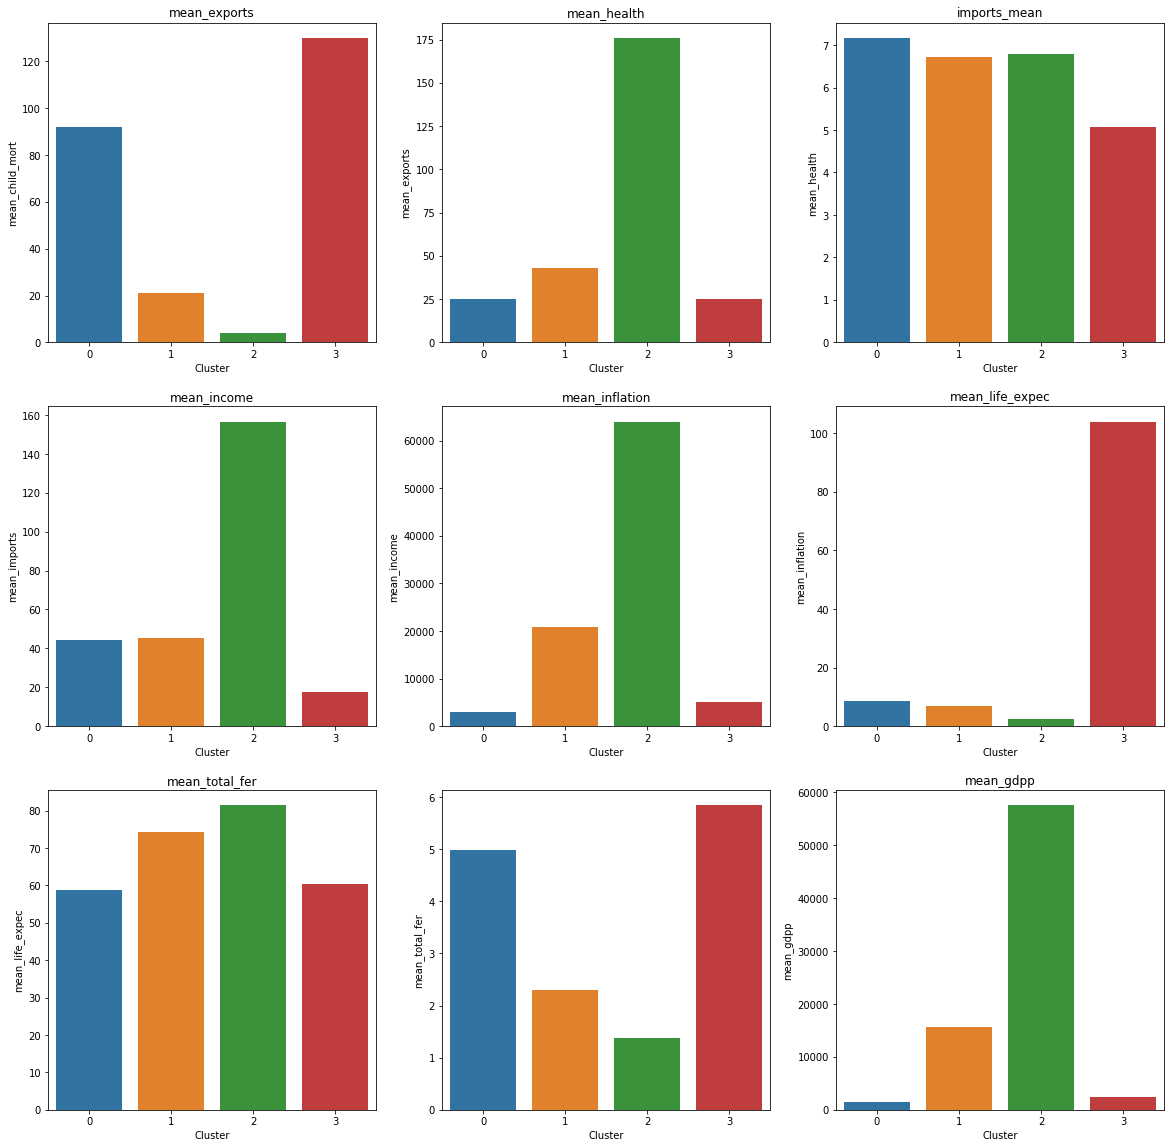

In [323]:
#Plots
plt.figure(figsize = (20,20))
plt.figure(1)

# Plot1
plt.title("mean_child_mort")
plt.subplot(3, 3, 1)
sns.barplot(Analysis_hierarchical_df.Cluster, Analysis_hierarchical_df.mean_child_mort)

# Plot2
plt.title("mean_exports")
plt.subplot(3, 3, 2)
sns.barplot(Analysis_hierarchical_df.Cluster, Analysis_hierarchical_df.mean_exports)

# Plot3
plt.title("mean_health")
plt.subplot(3, 3, 3)
sns.barplot(Analysis_hierarchical_df.Cluster, Analysis_hierarchical_df.mean_health)

# Plot4 
plt.title("imports_mean")
plt.subplot(3, 3, 4)
sns.barplot(Analysis_hierarchical_df.Cluster, Analysis_hierarchical_df.mean_imports)

# Plot5
plt.title("mean_income")
plt.subplot(3, 3, 5)
sns.barplot(Analysis_hierarchical_df.Cluster, Analysis_hierarchical_df.mean_income)

# Plot 6 
plt.title("mean_inflation")
plt.subplot(3, 3, 6)
sns.barplot(Analysis_hierarchical_df.Cluster, Analysis_hierarchical_df.mean_inflation)

# Plot 7 
plt.title("mean_life_expec")
plt.subplot(3, 3, 7)
sns.barplot(Analysis_hierarchical_df.Cluster, Analysis_hierarchical_df.mean_life_expec)

# Plot8
plt.title("mean_total_fer")
plt.subplot(3, 3, 8)
sns.barplot(Analysis_hierarchical_df.Cluster, Analysis_hierarchical_df.mean_total_fer)

# Plot 9
plt.subplot(3, 3, 9)
plt.title("mean_gdpp")
sns.barplot(Analysis_hierarchical_df.Cluster, Analysis_hierarchical_df.mean_gdpp)

plt.show()

As we can see from the above image that cluster 0 needs to paid aatention

In [324]:
hierarchical_data=final_merged_hierarchical_df[final_merged_hierarchical_df['Cluster']==0]

In [325]:
kmeans_data=final_merged_data[final_merged_data['Cluster']==1]

<h3>List of countries that need aid

In [326]:
#According to KMean, countries that need financial aid
for val in kmeans_data['country']:
    print(val)

Afghanistan
Angola
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo, Dem. Rep.
Congo, Rep.
Cote d'Ivoire
Equatorial Guinea
Eritrea
Gabon
Gambia
Ghana
Guinea
Guinea-Bissau
Haiti
Iraq
Kenya
Kiribati
Lao
Lesotho
Liberia
Madagascar
Malawi
Mali
Mauritania
Mozambique
Namibia
Niger
Nigeria
Pakistan
Rwanda
Senegal
Sierra Leone
South Africa
Sudan
Tanzania
Timor-Leste
Togo
Uganda
Yemen
Zambia


In [327]:
#According to Hierarchical, countries that need financial aid
for val in hierarchical_data['country']:
    print(val)

Afghanistan
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo, Dem. Rep.
Cote d'Ivoire
Gambia
Ghana
Guinea
Guinea-Bissau
Haiti
Iraq
Kenya
Kiribati
Lao
Lesotho
Liberia
Madagascar
Malawi
Mali
Micronesia, Fed. Sts.
Mozambique
Namibia
Niger
Rwanda
Senegal
Sierra Leone
South Africa
Sudan
Tanzania
Timor-Leste
Togo
Uganda
Yemen
Zambia


In [328]:
#List of Countries that are common in both model
for val in hierarchical_data['country']:
    for val1 in kmeans_data['country']:
        if val==val1:
            print(val1)
            break

Afghanistan
Benin
Botswana
Burkina Faso
Burundi
Cameroon
Central African Republic
Chad
Comoros
Congo, Dem. Rep.
Cote d'Ivoire
Gambia
Ghana
Guinea
Guinea-Bissau
Haiti
Iraq
Kenya
Kiribati
Lao
Lesotho
Liberia
Madagascar
Malawi
Mali
Mozambique
Namibia
Niger
Rwanda
Senegal
Sierra Leone
South Africa
Sudan
Tanzania
Timor-Leste
Togo
Uganda
Yemen
Zambia
